In [1]:
# Import useful libraries
import pandas as pd, json, pydeck as pdk, pickle, utils, matplotlib.pyplot as plt, calendar 

# **Generalization (II)**

The project aim is to create a Machine Learning model capable of detecting the dates when a crop field has been manured, using satellite data. <br>
As stated at the end of the first [notebook](./notebook1.ipynb) (in this generalization section), there is **homogeneity of spectral response to the manure application within crops** (manured) **located in the same country**. This has been said since training a model on features extracted from crops located in Italy ([other-fields](../../Datasets/other/other-fields.json)), and tested on detecting when other crops ([inva-tech](../../Datasets/other/inva-tech-fields.json)), still located in Italy, were manured gave significantly higher performance than using the best obtained model trained on crops manured in Spain. <br>
The objective of this generalization notebook is different from the first one, the aim is to check (using a model trained on all available manured crops located in Italy) the distribution of detections during a whole reference year (2018) for crops (still located in Italy) where there are no information about the actual manure application date/s ([dusaf-fields](../../Datasets/other/dusaf-fields.json)). The expect behavior is that the model detects more manure applications in periods of the year when is more likely (a-priori knowledge) that the fields are actually manured (spring period mainly).


**N.B:** Since using radar indexes is useless (as seen), they won't be considered. <br>
The dataset used to test generalization contains features that have been extracted using the [features-extraction notebook](../1-features-extraction/notebook.ipynb) (all crop fields details can be found in the [dusaf-fields JSON file](../../Datasets/other/dusaf-fields.json)).

In [2]:
s2_df =  pd.read_csv('../../Datasets/other/dusaf-fields-s2-features-extracted.gz', compression='gzip')

## **Show crop fields locations on Earth-map**

The objective is just visualizing where our crops, used to test the generalization capability of the final obtained model, are geographically located. This can provide several benefits, including:
* **Spatial context:** it can provide a spatial context that makes it easier to understand the geographic distribution of the fields. This can be especially useful for people who are not familiar with the area or the crops being considered
* **Data exploration:** it can make it easier to explore the data contained in the JSON file. Users can zoom in and out, pan, and filter the data to focus on specific areas or types of crops
* **Data validation:** it can help validate the data contained in the JSON file. Users can visually confirm that the crop fields are located in the correct locations, and identify any potential errors or discrepancies in the data
* **Communication:** it can be a powerful way to communicate data to others. Users can share the map with stakeholders or the public to help them understand the geographic distribution of crop fields

In [3]:
# Load JSON data from file
with open('../../Datasets/other/dusaf-fields.json') as f:
    data = json.load(f)

# Create DataFrame with properties excluding 'manure_dates' column
fields_df = pd.DataFrame([{k:v for k,v in f['properties'].items() if k!='manure_dates'} for f in data['features']])

# Add column with coordinates for each field
fields_df['polygon_coordinates'] = [[tuple(c) for c in p] for f in data['features'] for p in f['geometry']['coordinates']]

layer = pdk.Layer(
    'PolygonLayer',
    data=fields_df,
    get_polygon='polygon_coordinates',
    get_fill_color=[255, 255, 0, 100],
    get_line_color=[255, 255, 0, 100],
    stroked=True,
    filled=True,
    lineWidthMinPixels=3,
    pickable=True,
    auto_highlight=True,
)

# Define the initial view state of the map
view_state = pdk.ViewState(
    longitude=fields_df.polygon_coordinates[0][1][0],
    latitude=fields_df.polygon_coordinates[0][1][1],
    zoom=11
)

# Create the map with the layers and the initial view state
r = pdk.Deck(layers=layer, initial_view_state=view_state,)

# Show the map
r

{
  "initialViewState": {
    "latitude": 45.188507785196926,
    "longitude": 9.191660943034309,
    "zoom": 11
  },
  "layers": [
    {
      "@@type": "PolygonLayer",
      "autoHighlight": true,
      "data": [
        {
          "crop_field_name": "P-PVPR1",
          "polygon_coordinates": [
            [
              9.188887327750951,
              45.18836060226532
            ],
            [
              9.191660943034309,
              45.188507785196926
            ],
            [
              9.191803615264364,
              45.18717894075158
            ],
            [
              9.189181699147788,
              45.18686236025207
            ],
            [
              9.188887327750951,
              45.18836060226532
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR2",
          "polygon_coordinates": [
            [
              9.191857103292,
              45.188525619926374
            ],
            [
              9.195286195819103,
              45.188695086853194
            ],
            [
              9.194916111041437,
              45.18709869343876
            ],
            [
              9.19364973961811,
              45.187214647553425
            ],
            [
              9.192008787079626,
              45.18724588172433
            ],
            [
              9.191857103292,
              45.188525619926374
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR3",
          "polygon_coordinates": [
            [
              9.191968610826859,
              45.1887307145494
            ],
            [
              9.192066720124,
              45.19015319815826
            ],
            [
              9.195656335277219,
              45.19032264603181
            ],
            [
              9.195241609485077,
              45.18886448795147
            ],
            [
              9.191968610826859,
              45.1887307145494
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR4",
          "polygon_coordinates": [
            [
              9.1968245735711,
              45.192819701857516
            ],
            [
              9.197622752590485,
              45.19284648776876
            ],
            [
              9.198255980460086,
              45.19066152247412
            ],
            [
              9.197056481441106,
              45.19064814819448
            ],
            [
              9.1968245735711,
              45.192819701857516
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR5",
          "polygon_coordinates": [
            [
              9.192949622518718,
              45.1990802931523
            ],
            [
              9.194938392054244,
              45.199379090692275
            ],
            [
              9.195865847931595,
              45.197796086900716
            ],
            [
              9.19380129788414,
              45.19734123225092
            ],
            [
              9.192949622518718,
              45.1990802931523
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR6",
          "polygon_coordinates": [
            [
              9.195669711856553,
              45.1985898046708
            ],
            [
              9.196779994827839,
              45.199049067479464
            ],
            [
              9.197141208840888,
              45.19871914371016
            ],
            [
              9.19664173512246,
              45.19795659077001
            ],
            [
              9.196070999804258,
              45.19782731239389
            ],
            [
              9.195669711856553,
              45.1985898046708
            ]
          ]
        },
        {
          "crop_field_name": "P-PVPR7",
          "polygon_coordinates": [
            [
              9.197743165511032,
              4

## **Modify original DataFrame**

The purpose of building this `DataFrame`, and modifying the [original one](../../Datasets/other/other-fields-s2-features-extracted.gz), is to ensure that its data structure will be compliant with the one used to train the Machine Learning model.

By doing so, it can be ensured that the data is consistent and that the model can make predictions. This will help to check whether the research objectives have been achieved and ensure that the model is optimized for the classification task at hand.

In [4]:
# Sentinel-2
s2_df_mod = utils.get_modified_df(s2_df, sentinel=2)
s2_df_mod

,crop_field_name,consequent_s2_acquisitions,B1,B2,B3,B4,B5,B6,B7,B8,...,NDRE3,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI
0,P-PVPR1,"[2018-01-02, 2018-01-12]",494.189518,369.691405,220.457862,119.060797,133.932495,137.798742,125.877149,63.076730,...,-0.023921,307.124042,128.419087,38.223264,77.562365,0.021814,450.913410,-0.003839,0.140337,236.704822
1,P-PVPR1,"[2018-01-12, 2018-01-22]",-138.488050,-23.012159,47.511111,68.889727,94.083857,100.715723,87.660377,79.449476,...,-0.004620,204.186694,435.507992,21.041566,-18.144604,-0.016851,877.951729,0.017286,-0.301273,-751.537526
2,P-PVPR1,"[2018-01-22, 2018-02-11]",-61.834801,3.211321,-5.272117,-54.922013,-60.870021,-8.046122,-5.060797,33.287212,...,0.011141,-109.387245,-461.554295,7.811325,204.475119,0.068923,-211.738614,0.012652,0.062472,263.150943
3,P-PVPR1,"[2018-02-11, 2018-02-21]",1342.070440,1014.516981,913.399161,746.305241,722.202096,671.121593,614.743396,464.767296,...,-0.045869,1441.928094,1423.384195,-4.710746,-144.748126,-0.098232,2568.659715,0.016640,-0.277438,-282.914465
4,P-PVPR1,"[2018-02-21, 2018-02-26]",-1089.335010,-1009.765199,-1010.127463,-897.292243,-933.837317,-916.209224,-893.272537,-824.965618,...,0.027289,-1905.481344,-2312.208804,-46.007126,-71.872604,0.072051,-3587.549727,-0.035125,0.065708,57.350943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,P-PVPR264,"[2018-10-19, 2018-10-24]",-361.323402,-158.265738,-89.050937,24.757328,-25.320038,-21.501682,5.817395,62.501201,...,0.013016,-131.208749,794.417894,-77.258391,-123.189716,-0.037263,140.467924,-0.010388,-0.033885,-182.358481
12396,P-PVPR264,"[2018-10-24, 2018-11-18]",128.554541,-86.758289,-178.866891,-386.627583,-322.186929,-284.799616,-341.897165,-299.191735,...,0.015490,-501.458374,-3066.271482,125.175266,450.014301,0.154673,-1451.738960,0.026445,0.090346,414.774628
12397,P-PVPR264,"[2018-11-18, 2018-11-28]",-180.941855,-145.440173,-110.119654,-128.771264,-134.161461,-119.775589,-113.964921,-108.172033,...,0.004098,-259.814132,-672.479769,3.776023,58.759404,0.032405,-654.473838,0.017584,0.031294,144.262374
12398,P-PVPR264,"[2018-11-28, 2018-12-03]",226.649207,307.943777,209.658818,144.784719,136.730899,122.355118,135.669870,45.909178,...,-0.026834,276.274158,241.720352,0.919148,-41.177184,-0.019736,753.412700,-0.013197,-0.044641,-212.889957


## **Test the best obtained model, on new unseen data**

The primary objective is to conduct a comprehensive test to evaluate the generalization capability of the best obtained model, specifically for crops located in Italy. Please notice that in this case we do not have information about the manure date/s of each crop field.

### Load the model and the feature scaler

In the previous stage, the best model configuration was stored in memory.
Therefore, there is the need to retrieve the stored model and scaler (**if used**), to ensure that the indexes are transformed correctly and the model can make accurate predictions. 

This is an important step, as it will enable us to reuse the best model configuration and avoid the need to retrain the model from scratch, saving us time and resources.

*N.B:* The model and scaler are loaded directly from the `'../3-ml-models/saved-config'` folder, so be sure that they are the ones relative to training (and normalization) applied to all crops available located in Italy.

In [5]:
model = pickle.load(open('../3-ml-models/saved-config/model.pkl', 'rb'))
scaler = pickle.load(open('../3-ml-models/saved-config/scaler.pkl', 'rb'))

### Select the useful indexes, and the column to be predicted

It is quite obvious that the selected features should be exactly the same as the ones used by the best model for making predictions.

In [6]:
X = s2_df_mod[['EOMI3', 'SCI', 'EOMI1', 'SDI']]

### Investigation

What is the number of times the model detects manure applications, no matters the crop, for each month of the year of interest (2018)?

In [7]:
y_pred = model.predict(scaler.transform(X) if scaler != None else X)

In [8]:
# Append to the modified DataFrame the prediction column
s2_df_mod2 = pd.concat([s2_df_mod, pd.DataFrame(y_pred).rename(columns={0:'y_pred'})], axis=1)

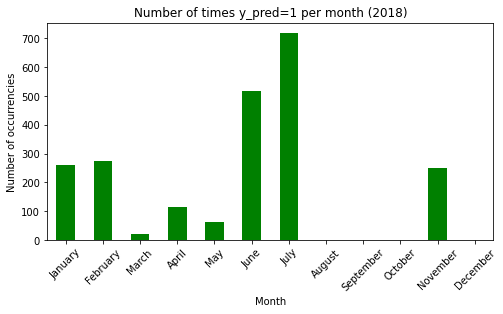

In [9]:
(s2_df_mod2[s2_df_mod2['y_pred'] == 1].consequent_s2_acquisitions.apply(lambda x: x[18:20]).value_counts().sort_index()).clip(0).plot(kind='bar', color='g', ylabel='Number of occurrencies', xlabel='Month', title='Number of times y_pred=1 per month (2018)', figsize=(8, 4));
plt.xticks(ticks=list(range(0, 12)), labels=list(calendar.month_name)[1:], rotation=45);

This behavior is not exactly the one expected (there are a lot of detections during summer months), so it means that this is not truly the best model (at least in generalization). To overcome this issue many choices can be taken, for example to change the features used for training the model (or add others).

An interesting experiment showed that **combining thermal indexes** (`B10` and `B11`) **from `landsat-8` with the optical ones already extracted from `sentinel-2`** (`EOMI3`, `SCI`, `EOMI1`, `SDI`) **allowed to improve the obtained performances for models trained** (and tested) **on crops located within the same country** (recall the homogeneity of spectral response pointed out initially), **handling properly the difference in temporal resolution** for the two satellites constellations.
<br>If a model is trained on the italian context (combining the above mentioned indexes), what occurs for the DUSAF is the following behavior:

<img src="https://i.ibb.co/rsygtLp/dusaf-2.png" border="0" width=520>

This is better from what obtained previously, but still remains an unexplained abundance of alleged false positives during the summer months (July and August).

In conclusion, although the classification problem related to manure application is not as simple as it seems to be, the developed model and results should not be disregarded. It provides a valuable foundation for developing fast and low-price tools to monitor manure application in crop fields (by analyzing satellites indexes time-series). This research represents an attempt to ensure compliance with environmental regulations, such as the [EU Nitrates Directives](https://environment.ec.europa.eu/topics/water/nitrates_en), and **there is still space for further improvements**.